### Loading Free GPU (Tesla T4)



*   Connect to GPU in runtime
*   Check for GPU status below





In [ ]:
!nvidia-smi

/bin/bash: line 1: nvidia-smi: command not found


### Importing Libraries

**OS Library of Operating System Management**

In [ ]:
import os
HOME = os.getcwd()
print(HOME)

/content


**Importing Libraries Required**

In [ ]:
# Pip install method (recommended)

!pip install ultralytics==8.0.196

from IPython import display
display.clear_output()

import ultralytics
ultralytics.checks()

Ultralytics YOLOv8.0.196 🚀 Python-3.10.12 torch-2.1.0+cu121 CPU (Intel Xeon 2.20GHz)
Setup complete ✅ (2 CPUs, 12.7 GB RAM, 26.3/107.7 GB disk)


### Pre-Trained Model






**Using *YOLOv8x* model**

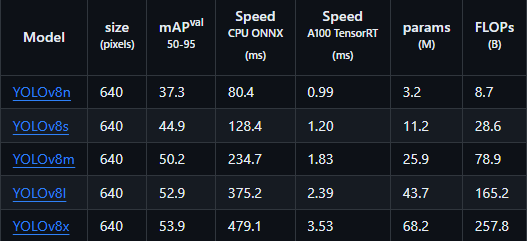

**Refer the official Github Link --->** [Ultralytics](https://github.com/ultralytics/ultralytics)

In [ ]:
SOURCE_VIDEO_PATH = f"{HOME}/Video2.mp4"

In [ ]:
MODEL = "yolov8x.pt"

In [ ]:
from ultralytics import YOLO

model = YOLO(MODEL)
model.fuse()

100%|██████████| 131M/131M [00:00<00:00, 187MB/s]
YOLOv8x summary (fused): 268 layers, 68200608 parameters, 0 gradients, 257.8 GFLOPs


In [ ]:
%cd {HOME}

/content


In [ ]:
%cd {HOME}
!yolo task=detect mode=predict model=yolov8x.pt conf=0.25 source={SOURCE_VIDEO_PATH}

In [ ]:
!ffmpeg -i {"/content/runs/detect/predict/object.avi"} -vcodec libx264 -f mp4 {"output.mp4"}

###Custom Dataset###

**Training Custom Model on Images**

**There various Open-Source software for image collection and annotation**
*   *like Roboflow, ImageNet, COCO, Kaggle, etc.*

**Steps Involved**
1.   *Collect Sufficient Amount of Images*
2.   *Use various Open-Source Software for making annotaion, b-box, classes*
3.   *Split the Images in Train, Val and Test Folders ( TRAIN 70% | VAL 20% | TEST 10% )*
4.   *Create a **.yaml** file with contains classes, paths for train, val, test folders*
5.   *Run .yaml file in Python Script Or CLI to train the data*








In [ ]:
from ultralytics import YOLO

from IPython.display import display, Image

In [ ]:
!mkdir {HOME}/datasets
%cd {HOME}/datasets

!pip install roboflow --quiet

!pip install roboflow

from roboflow import Roboflow
rf = Roboflow(api_key="oh112yEkX4ifeNcHPzyh")
project = rf.workspace("roboflow-100").project("vehicles-q0x2v")
dataset = project.version(2).download("yolov8-obb")


/content/datasets
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 70.2/70.2 kB 2.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 158.3/158.3 kB 9.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 178.7/178.7 kB 12.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 58.8/58.8 kB 6.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 49.1/49.1 MB 15.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 86.7/86.7 kB 8.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 54.5/54.5 kB 6.5 MB/s eta 0:00:00
loading Roboflow workspace...
loading Roboflow project...



Extracting Dataset Version Zip to vehicles-2 in yolov8-obb:: 100%|██████████| 8128/8128 [00:01<00:00, 5000.09it/s]


##Custom model training##

**Custom Model Training Without GPU**
*   *Avg 25 min for 1 epoch*




In [ ]:
from ultralytics import YOLO
%cd {HOME}
model = YOLO("yolov8n.yaml")
results = model.train(data = r"/content/datasets/vehicles-2/data.yaml", epochs=1)


                   from  n    params  module                                       arguments                     
  0                  -1  1       464  ultralytics.nn.modules.conv.Conv             [3, 16, 3, 2]                 
  1                  -1  1      4672  ultralytics.nn.modules.conv.Conv             [16, 32, 3, 2]                
  2                  -1  1      7360  ultralytics.nn.modules.block.C2f             [32, 32, 1, True]             
  3                  -1  1     18560  ultralytics.nn.modules.conv.Conv             [32, 64, 3, 2]                
  4                  -1  2     49664  ultralytics.nn.modules.block.C2f             [64, 64, 2, True]             
  5                  -1  1     73984  ultralytics.nn.modules.conv.Conv             [64, 128, 3, 2]               
  6                  -1  2    197632  ultralytics.nn.modules.block.C2f             [128, 128, 2, True]           
  7                  -1  1    295424  ultralytics.nn.modules.conv.Conv             [128

/content


YOLOv8n summary: 225 layers, 3157200 parameters, 3157184 gradients, 8.9 GFLOPs

New https://pypi.org/project/ultralytics/8.1.18 available 😃 Update with 'pip install -U ultralytics'
Ultralytics YOLOv8.0.196 🚀 Python-3.10.12 torch-2.1.0+cu121 CPU (AMD EPYC 7B12)
engine/trainer: task=detect, mode=train, model=yolov8n.yaml, data=/content/datasets/vehicles-2/data.yaml, epochs=1, patience=50, batch=16, imgsz=640, save=True, save_period=-1, cache=False, device=None, workers=8, project=None, name=None, exist_ok=False, pretrained=True, optimizer=auto, verbose=True, seed=0, deterministic=True, single_cls=False, rect=False, cos_lr=False, close_mosaic=10, resume=False, amp=True, fraction=1.0, profile=False, freeze=None, overlap_mask=True, mask_ratio=4, dropout=0.0, val=True, split=val, save_json=False, save_hybrid=False, conf=None, iou=0.7, max_det=300, half=False, dnn=False, plots=True, source=None, show=False, save_txt=False, save_conf=False, save_crop=False, show_labels=True, show_conf=True, vi

In [ ]:
model = YOLO("yolov8n.yaml")
results = model.train(data = r"/content/datasets/vehicles-2/data.yaml", epochs=100)


                   from  n    params  module                                       arguments                     
  0                  -1  1       464  ultralytics.nn.modules.conv.Conv             [3, 16, 3, 2]                 
  1                  -1  1      4672  ultralytics.nn.modules.conv.Conv             [16, 32, 3, 2]                
  2                  -1  1      7360  ultralytics.nn.modules.block.C2f             [32, 32, 1, True]             
  3                  -1  1     18560  ultralytics.nn.modules.conv.Conv             [32, 64, 3, 2]                
  4                  -1  2     49664  ultralytics.nn.modules.block.C2f             [64, 64, 2, True]             
  5                  -1  1     73984  ultralytics.nn.modules.conv.Conv             [64, 128, 3, 2]               
  6                  -1  2    197632  ultralytics.nn.modules.block.C2f             [128, 128, 2, True]           
  7                  -1  1    295424  ultralytics.nn.modules.conv.Conv             [128

**Custom Model Training With GPU**
*   *75 min for 25 epochs*
*   *Avg of 3 min for 1 epoch*




In [ ]:
%cd {HOME}

!yolo task=detect mode=train model=yolov8s.pt data={dataset.location}/data.yaml epochs=25 imgsz=800 plots=True

/content
100% 21.5M/21.5M [00:00<00:00, 231MB/s]
New https://pypi.org/project/ultralytics/8.1.18 available 😃 Update with 'pip install -U ultralytics'
Ultralytics YOLOv8.0.196 🚀 Python-3.10.12 torch-2.1.0+cu121 CUDA:0 (Tesla T4, 15102MiB)
engine/trainer: task=detect, mode=train, model=yolov8s.pt, data=/content/datasets/vehicles-2/data.yaml, epochs=25, patience=50, batch=16, imgsz=800, save=True, save_period=-1, cache=False, device=None, workers=8, project=None, name=None, exist_ok=False, pretrained=True, optimizer=auto, verbose=True, seed=0, deterministic=True, single_cls=False, rect=False, cos_lr=False, close_mosaic=10, resume=False, amp=True, fraction=1.0, profile=False, freeze=None, overlap_mask=True, mask_ratio=4, dropout=0.0, val=True, split=val, save_json=False, save_hybrid=False, conf=None, iou=0.7, max_det=300, half=False, dnn=False, plots=True, source=None, show=False, save_txt=False, save_conf=False, save_crop=False, show_labels=True, show_conf=True, vid_stride=1, stream_buffe

In [ ]:
!ls {HOME}/runs/detect/train/

args.yaml					    R_curve.png		 val_batch0_labels.jpg
confusion_matrix_normalized.png			    results.csv		 val_batch0_pred.jpg
confusion_matrix.png				    results.png		 val_batch1_labels.jpg
events.out.tfevents.1708677253.766f924d37d1.1677.0  train_batch0.jpg	 val_batch1_pred.jpg
F1_curve.png					    train_batch1.jpg	 val_batch2_labels.jpg
labels_correlogram.jpg				    train_batch2475.jpg  val_batch2_pred.jpg
labels.jpg					    train_batch2476.jpg  weights
P_curve.png					    train_batch2477.jpg
PR_curve.png					    train_batch2.jpg


/content


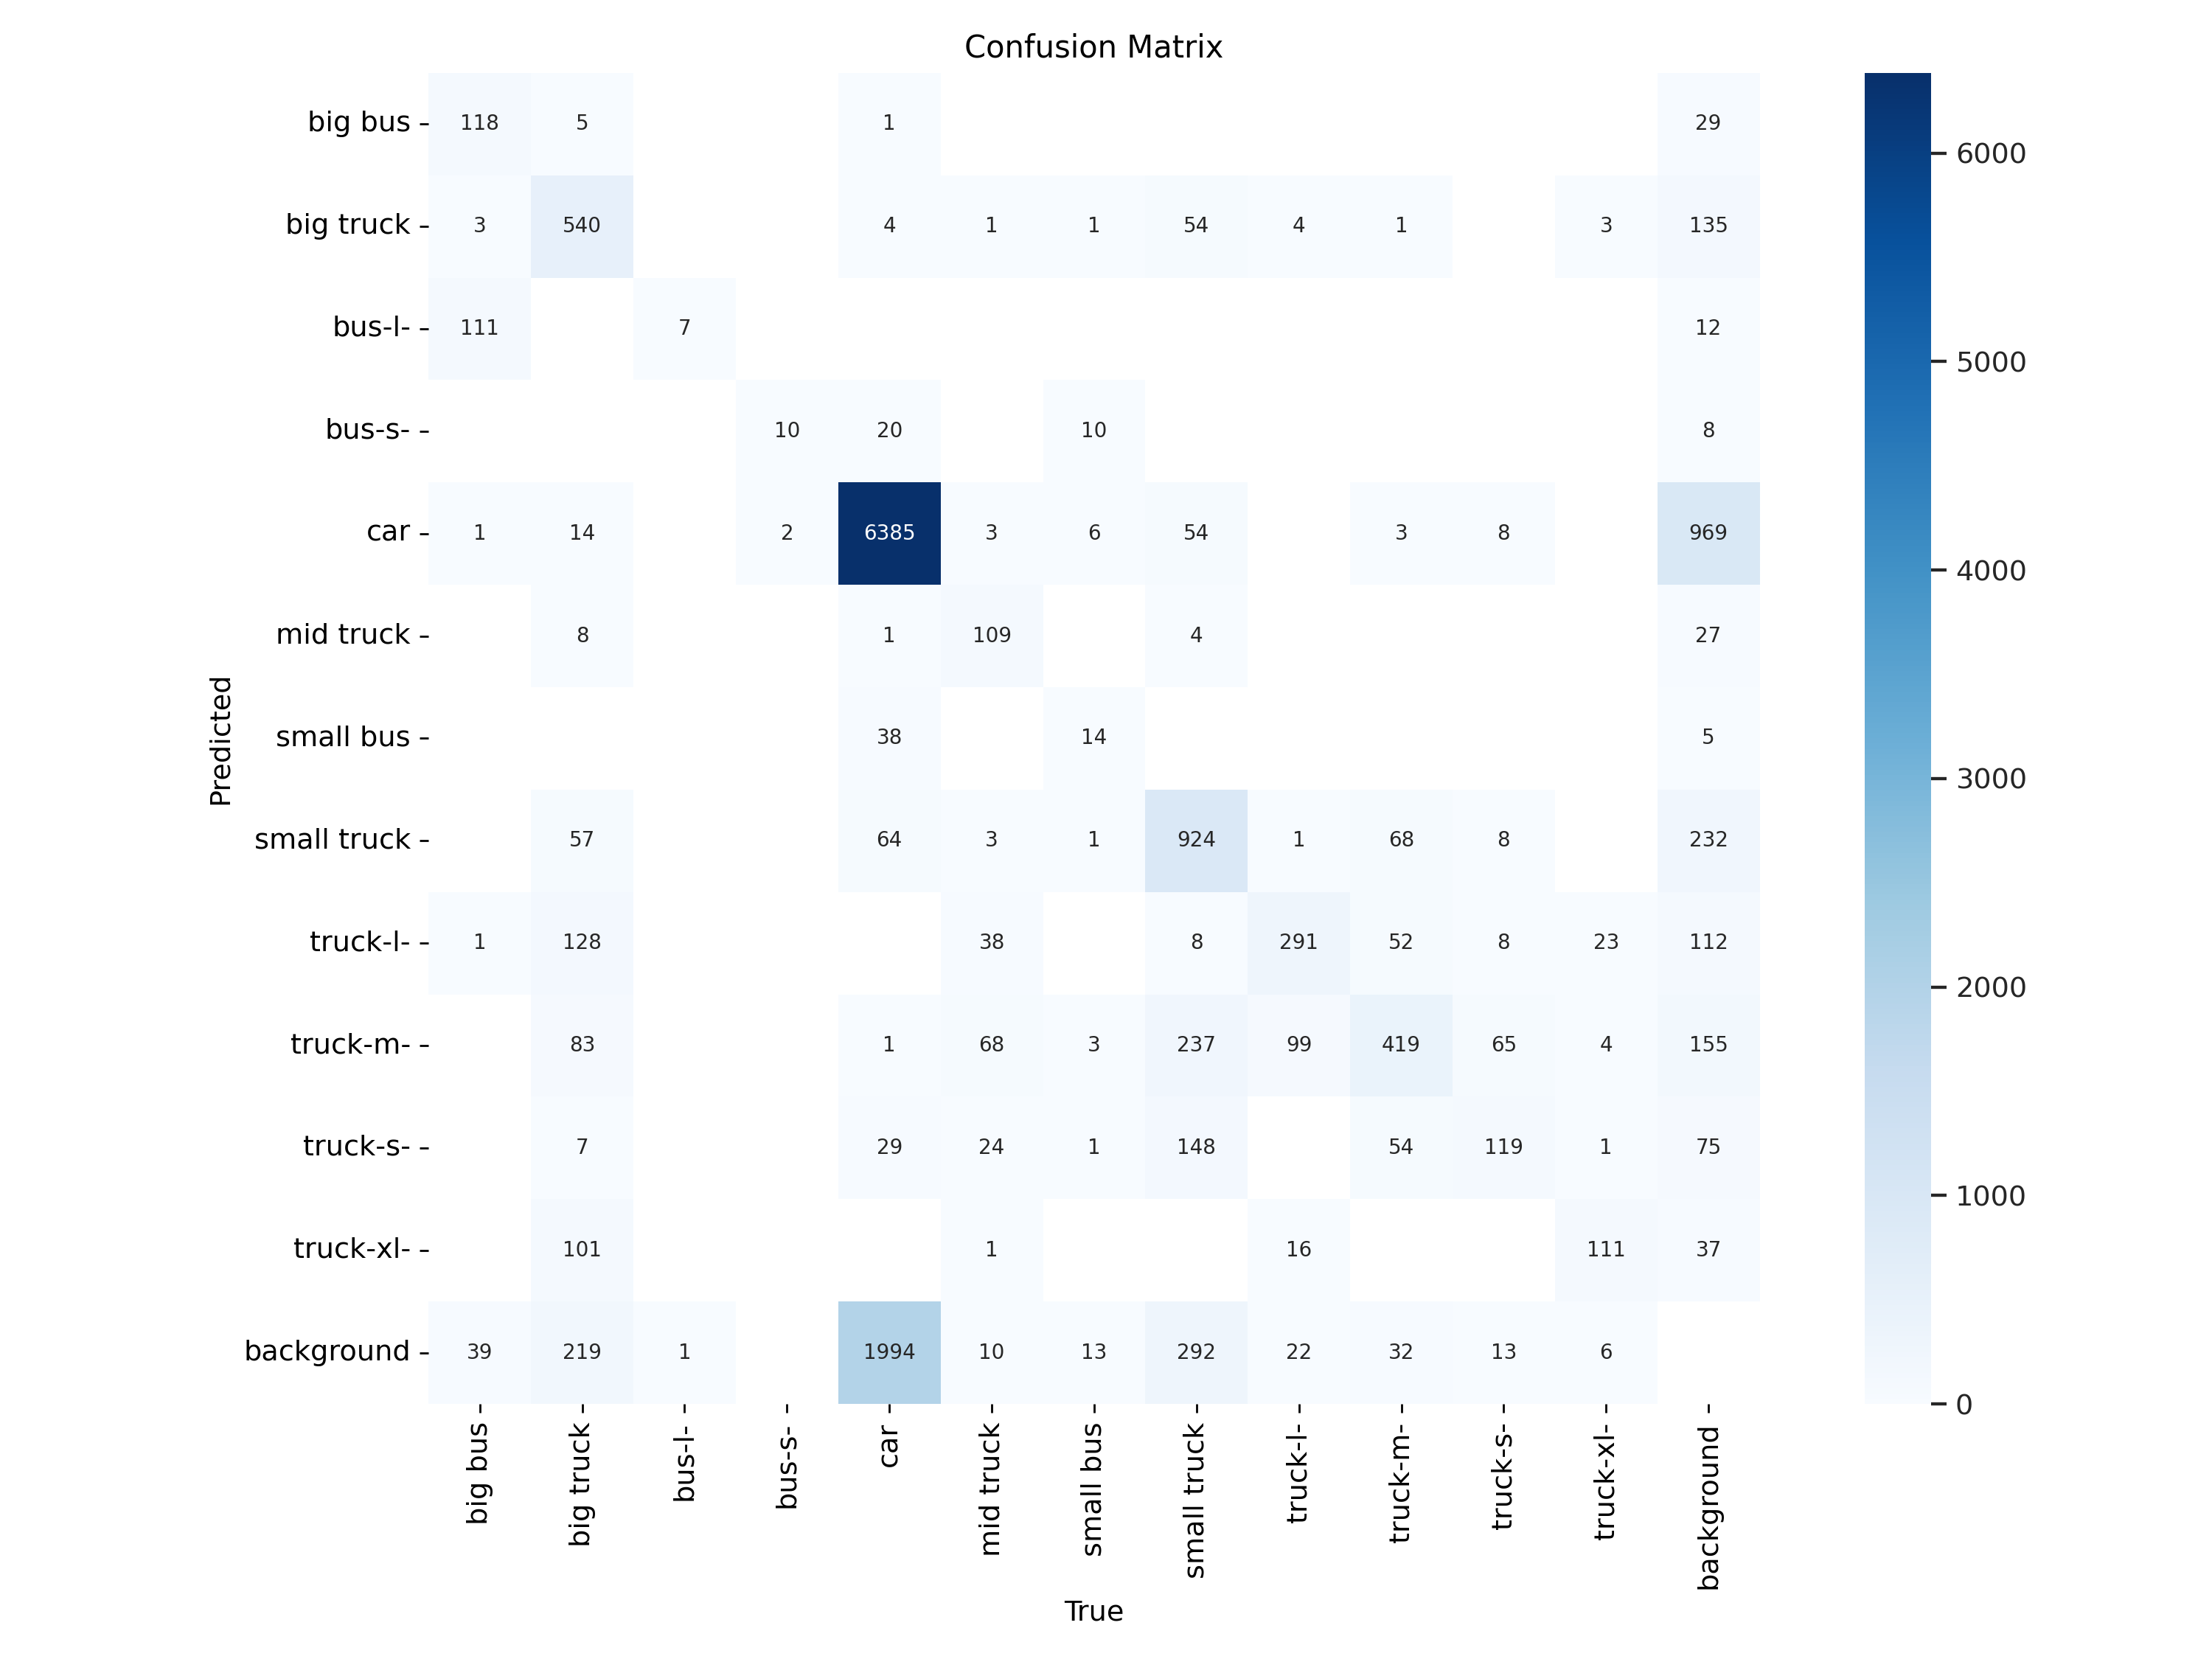

In [ ]:
%cd {HOME}
Image(filename=f'{HOME}/runs/detect/train/confusion_matrix.png', width=600)

/content


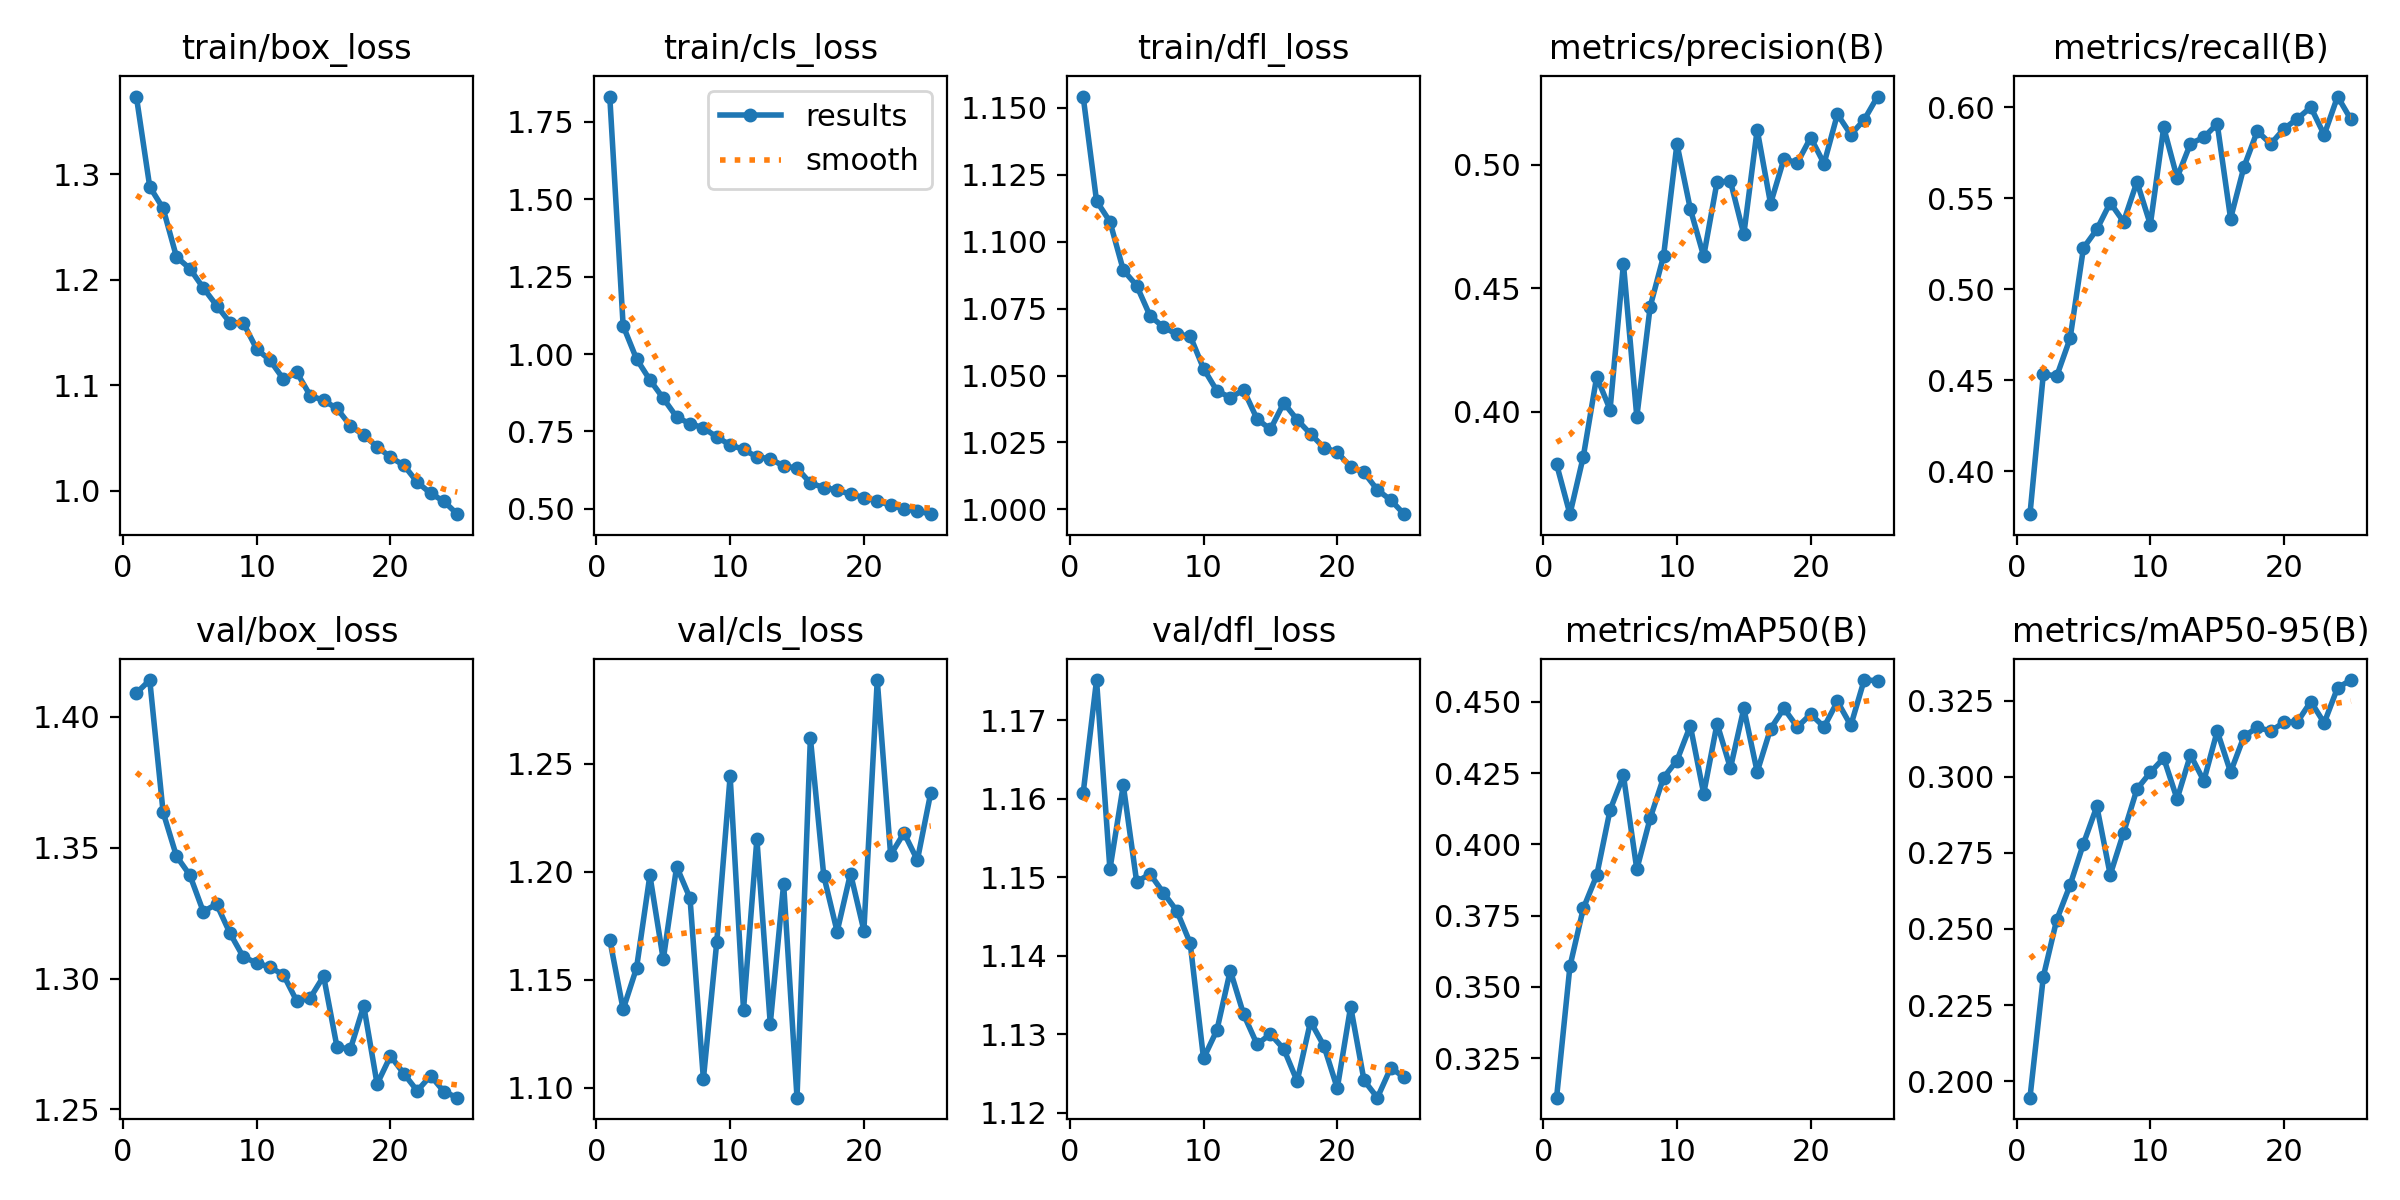

In [ ]:
%cd {HOME}
Image(filename=f'{HOME}/runs/detect/train/results.png', width=600)

/content


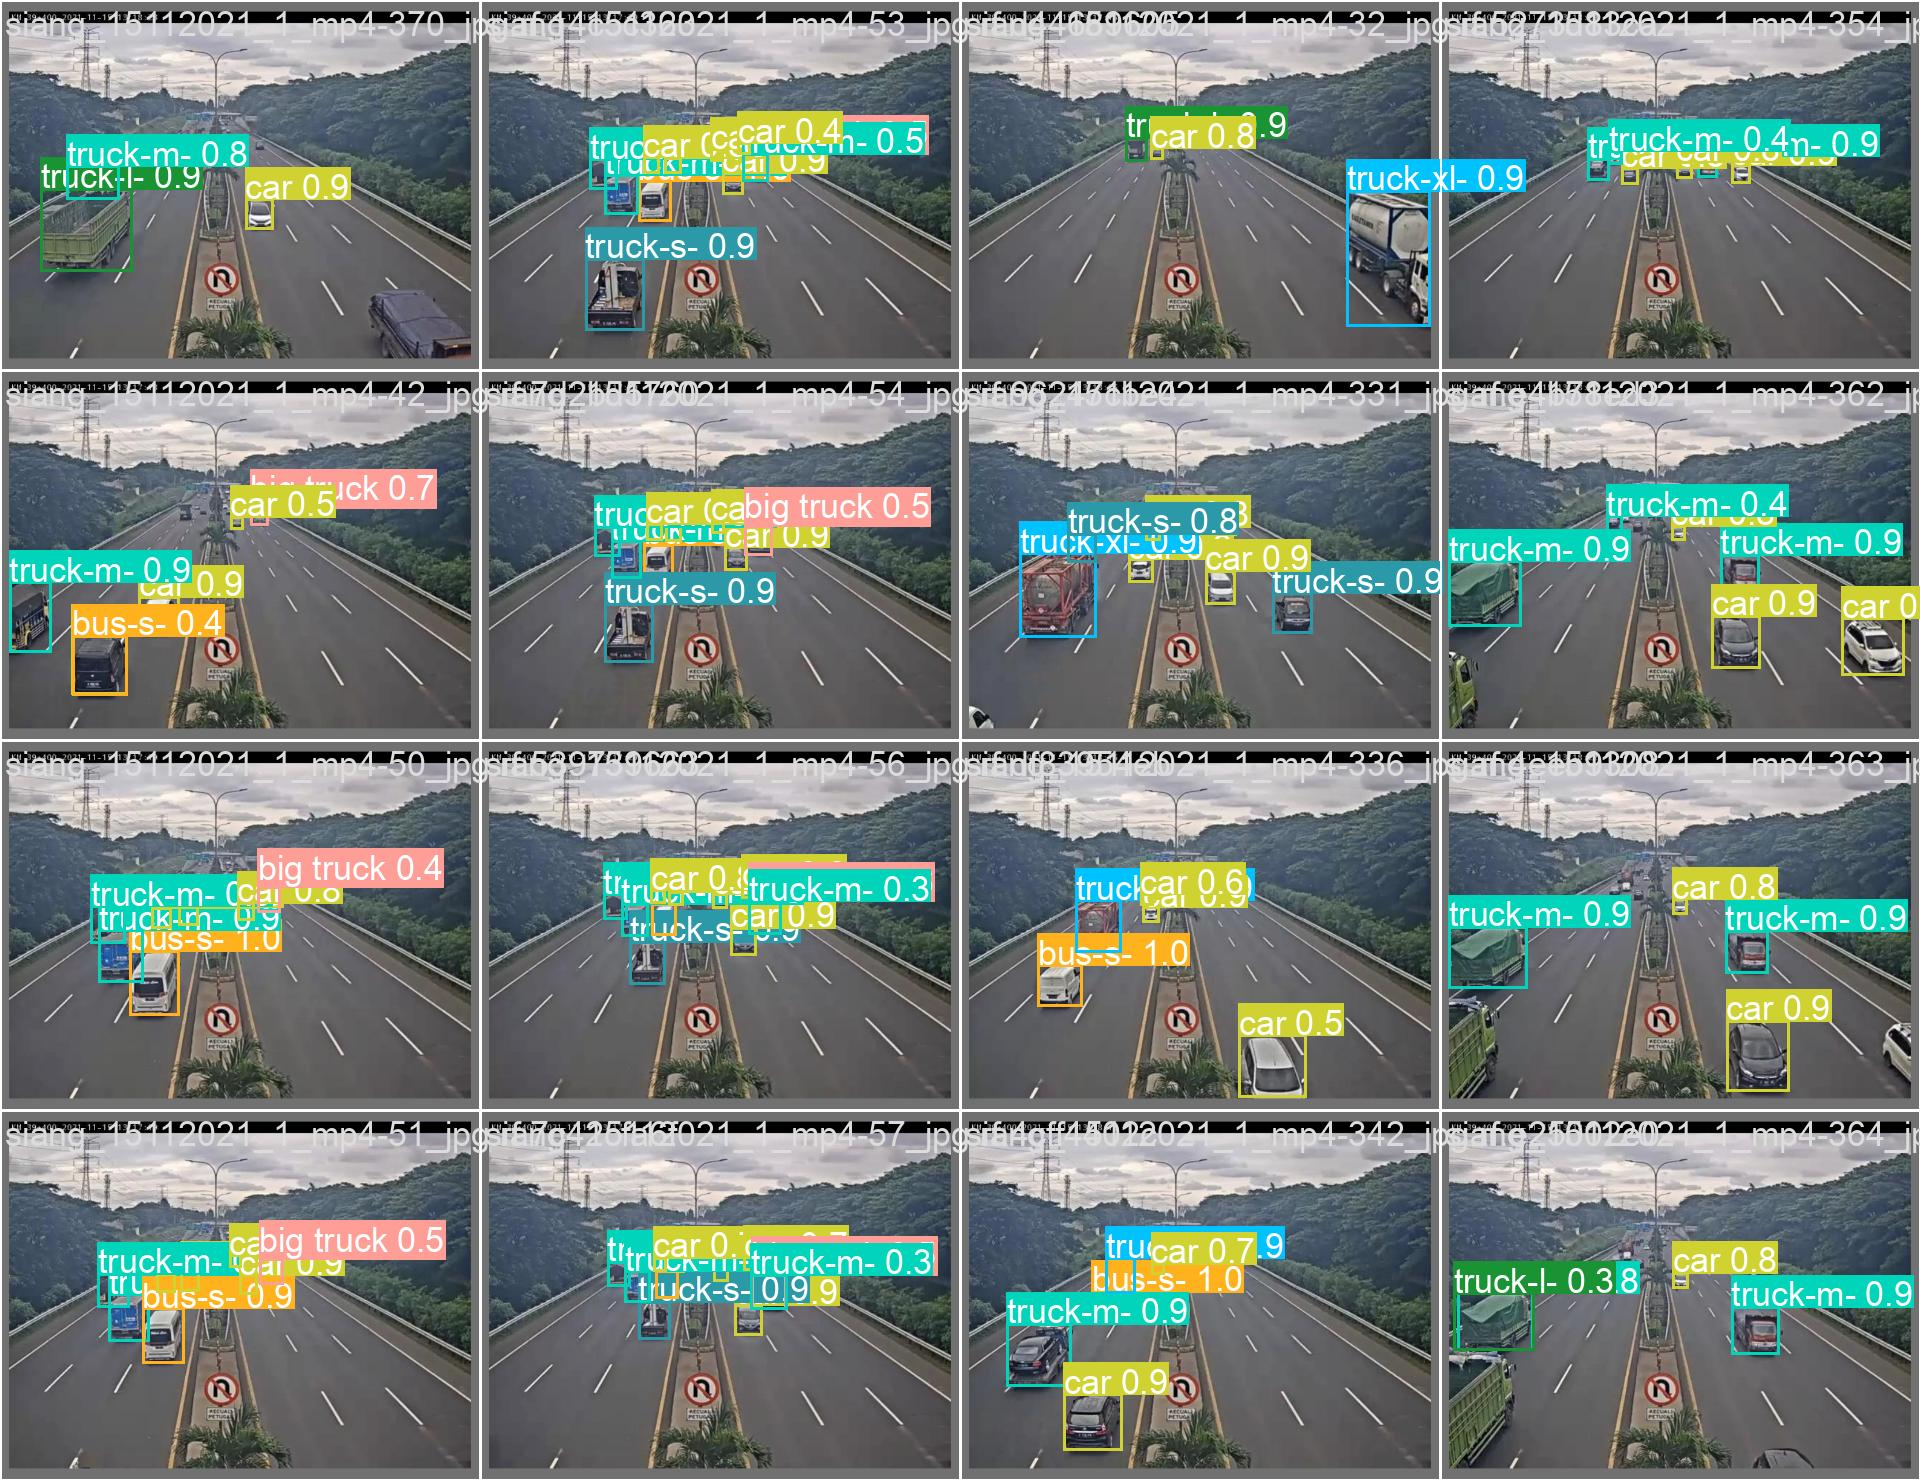

In [ ]:
%cd {HOME}
Image(filename=f'{HOME}/runs/detect/train/val_batch0_pred.jpg', width=600)

##Validation of Model##

In [ ]:
%cd {HOME}

!yolo task=detect mode=val model={HOME}/runs/detect/train/weights/best.pt data={dataset.location}/data.yaml

/content
Ultralytics YOLOv8.0.196 🚀 Python-3.10.12 torch-2.1.0+cu121 CUDA:0 (Tesla T4, 15102MiB)
Model summary (fused): 168 layers, 11130228 parameters, 0 gradients, 28.5 GFLOPs
val: Scanning /content/datasets/vehicles-2/valid/labels.cache... 966 images, 3 backgrounds, 0 corrupt: 100% 966/966 [00:00<?, ?it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100% 61/61 [00:24<00:00,  2.45it/s]
                   all        966      13450      0.528      0.593      0.458      0.332
               big bus        966        273      0.861      0.432      0.742      0.557
             big truck        966       1162      0.837      0.438       0.65      0.432
                bus-l-        966          8     0.0579      0.875     0.0561     0.0309
                bus-s-        966         12      0.228      0.833      0.364      0.313
                   car        966       8537      0.892      0.693      0.824      0.531
             mid truck       

##Inference on Custome Model##

In [ ]:
%cd {HOME}
!yolo task=detect mode=predict model={HOME}/runs/detect/train/weights/best.pt conf=0.25 source={dataset.location}/test/images save=True

/content
Ultralytics YOLOv8.0.196 🚀 Python-3.10.12 torch-2.1.0+cu121 CUDA:0 (Tesla T4, 15102MiB)
Model summary (fused): 168 layers, 11130228 parameters, 0 gradients, 28.5 GFLOPs

image 1/458 /content/datasets/vehicles-2/test/images/adit_mp4-1002_jpg.rf.5e4018e963af1251b3f7e6fd487c479e.jpg: 608x800 1 big truck, 5 cars, 1 truck-m-, 1 truck-xl-, 161.1ms
image 2/458 /content/datasets/vehicles-2/test/images/adit_mp4-1008_jpg.rf.e20ac34ac20c029e179d9c8bee45a078.jpg: 608x800 2 big trucks, 11 cars, 18.6ms
image 3/458 /content/datasets/vehicles-2/test/images/adit_mp4-1022_jpg.rf.8ec648b3f53103ded740458e94ae21f5.jpg: 608x800 11 cars, 1 truck-m-, 18.5ms
image 4/458 /content/datasets/vehicles-2/test/images/adit_mp4-1028_jpg.rf.d9e26a9972e7a6815a2dff1bf35aca60.jpg: 608x800 2 big trucks, 12 cars, 18.5ms
image 5/458 /content/datasets/vehicles-2/test/images/adit_mp4-1035_jpg.rf.d42b43d55c46df6098b9bd71317b740d.jpg: 608x800 2 big trucks, 10 cars, 18.6ms
image 6/458 /content/datasets/vehicles-2/test/ima

In [ ]:
!zip -r /content/runs.zip /content/runs

updating: content/runs/ (stored 0%)
updating: content/runs/detect/ (stored 0%)
updating: content/runs/detect/train/ (stored 0%)
updating: content/runs/detect/train/results.csv (deflated 84%)
updating: content/runs/detect/train/PR_curve.png (deflated 7%)
updating: content/runs/detect/train/weights/ (stored 0%)
updating: content/runs/detect/train/weights/best.pt (deflated 8%)
updating: content/runs/detect/train/weights/last.pt (deflated 8%)
updating: content/runs/detect/train/confusion_matrix.png (deflated 18%)
updating: content/runs/detect/train/val_batch1_labels.jpg (deflated 6%)
updating: content/runs/detect/train/labels.jpg (deflated 29%)
updating: content/runs/detect/train/results.png (deflated 7%)
updating: content/runs/detect/train/train_batch1.jpg (deflated 3%)
updating: content/runs/detect/train/train_batch2475.jpg (deflated 8%)
updating: content/runs/detect/train/events.out.tfevents.1708677253.766f924d37d1.1677.0 (deflated 79%)
updating: content/runs/detect/train/train_batch0.j

In [ ]:
from google.colab import files
files.download("/content/runs.zip")

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [ ]:
!nvidia-smi

Fri Feb 23 10:07:31 2024       
+---------------------------------------------------------------------------------------+
| NVIDIA-SMI 535.104.05             Driver Version: 535.104.05   CUDA Version: 12.2     |
|-----------------------------------------+----------------------+----------------------+
| GPU  Name                 Persistence-M | Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp   Perf          Pwr:Usage/Cap |         Memory-Usage | GPU-Util  Compute M. |
|                                         |                      |               MIG M. |
|=========================================+======================+======================|
|   0  Tesla T4                       Off | 00000000:00:04.0 Off |                    0 |
| N/A   34C    P8               9W /  70W |      3MiB / 15360MiB |      0%      Default |
|                                         |                      |                  N/A |
+-----------------------------------------+----------------------+--

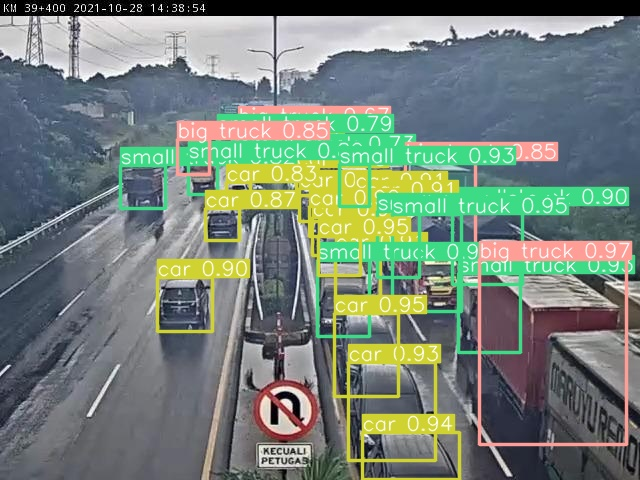

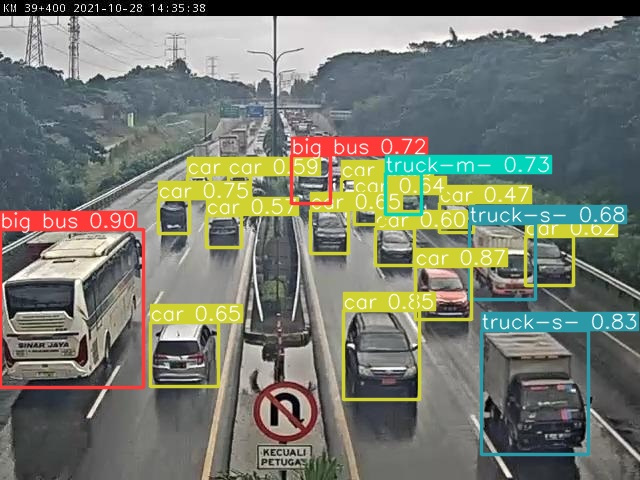

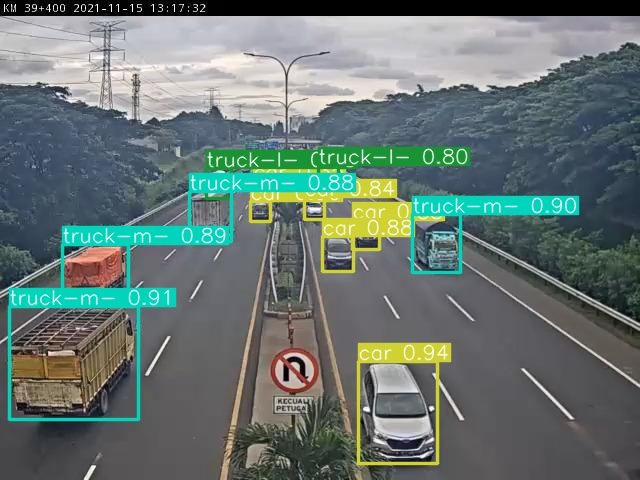

In [ ]:
import glob
from IPython.display import Image, display

for image_path in glob.glob(f'{HOME}/runs/detect/predict/*.jpg')[:3]:
      display(Image(filename=image_path, width=600))
      print("\n")

In [ ]:
SOURCE_VIDEO_PATH = f"{HOME}/Video1.mp4"

##Testing on Own Video##

**VIDEO 1**

In [ ]:
!yolo detect predict model=best.pt line_thickness=1 source="/content/Video1.mp4"

WARNING ⚠️ 'line_thickness' is deprecated and will be removed in 'ultralytics 8.2' in the future. Please use 'line_width' instead.
Ultralytics YOLOv8.0.196 🚀 Python-3.10.12 torch-2.1.0+cu121 CUDA:0 (Tesla T4, 15102MiB)
Model summary (fused): 168 layers, 11130228 parameters, 0 gradients, 28.5 GFLOPs

video 1/1 (1/1534) /content/Video1.mp4: 480x800 10 cars, 1 truck-s-, 118.3ms
video 1/1 (2/1534) /content/Video1.mp4: 480x800 10 cars, 1 truck-s-, 15.7ms
video 1/1 (3/1534) /content/Video1.mp4: 480x800 10 cars, 1 truck-s-, 15.7ms
video 1/1 (4/1534) /content/Video1.mp4: 480x800 10 cars, 1 truck-s-, 15.7ms
video 1/1 (5/1534) /content/Video1.mp4: 480x800 10 cars, 1 truck-s-, 15.7ms
video 1/1 (6/1534) /content/Video1.mp4: 480x800 11 cars, 1 truck-s-, 15.7ms
video 1/1 (7/1534) /content/Video1.mp4: 480x800 11 cars, 1 truck-s-, 15.7ms
video 1/1 (8/1534) /content/Video1.mp4: 480x800 11 cars, 1 truck-s-, 15.3ms
video 1/1 (9/1534) /content/Video1.mp4: 480x800 11 cars, 1 truck-s-, 15.4ms
video 1/1 (10/

In [ ]:
!ffmpeg -i {"/content/runs/detect/predict4/Video1.avi"} -vcodec libx264 -f mp4 {"output1.mp4"}

ffmpeg version 4.4.2-0ubuntu0.22.04.1 Copyright (c) 2000-2021 the FFmpeg developers
  built with gcc 11 (Ubuntu 11.2.0-19ubuntu1)
  configuration: --prefix=/usr --extra-version=0ubuntu0.22.04.1 --toolchain=hardened --libdir=/usr/lib/x86_64-linux-gnu --incdir=/usr/include/x86_64-linux-gnu --arch=amd64 --enable-gpl --disable-stripping --enable-gnutls --enable-ladspa --enable-libaom --enable-libass --enable-libbluray --enable-libbs2b --enable-libcaca --enable-libcdio --enable-libcodec2 --enable-libdav1d --enable-libflite --enable-libfontconfig --enable-libfreetype --enable-libfribidi --enable-libgme --enable-libgsm --enable-libjack --enable-libmp3lame --enable-libmysofa --enable-libopenjpeg --enable-libopenmpt --enable-libopus --enable-libpulse --enable-librabbitmq --enable-librubberband --enable-libshine --enable-libsnappy --enable-libsoxr --enable-libspeex --enable-libsrt --enable-libssh --enable-libtheora --enable-libtwolame --enable-libvidstab --enable-libvorbis --enable-libvpx --enab

In [ ]:
files.download("/content/output1.mp4")

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

**VIDEO 2**

In [ ]:
!yolo detect predict model = best.pt source = "/content/Video2.mp4"

Ultralytics YOLOv8.0.196 🚀 Python-3.10.12 torch-2.1.0+cu121 CUDA:0 (Tesla T4, 15102MiB)
Model summary (fused): 168 layers, 11130228 parameters, 0 gradients, 28.5 GFLOPs

video 1/1 (1/3280) /content/Video2.mp4: 480x800 3 cars, 1 small truck, 1 truck-m-, 100.0ms
video 1/1 (2/3280) /content/Video2.mp4: 480x800 3 cars, 1 small truck, 1 truck-m-, 15.7ms
video 1/1 (3/3280) /content/Video2.mp4: 480x800 3 cars, 2 small trucks, 1 truck-m-, 15.6ms
video 1/1 (4/3280) /content/Video2.mp4: 480x800 3 cars, 1 small truck, 15.6ms
video 1/1 (5/3280) /content/Video2.mp4: 480x800 3 cars, 1 small truck, 15.9ms
video 1/1 (6/3280) /content/Video2.mp4: 480x800 3 cars, 1 truck-l-, 15.6ms
video 1/1 (7/3280) /content/Video2.mp4: 480x800 3 cars, 1 small truck, 15.6ms
video 1/1 (8/3280) /content/Video2.mp4: 480x800 3 cars, 1 small truck, 2 truck-l-s, 21.4ms
video 1/1 (9/3280) /content/Video2.mp4: 480x800 3 cars, 2 truck-l-s, 15.6ms
video 1/1 (10/3280) /content/Video2.mp4: 480x800 3 cars, 2 truck-l-s, 15.6ms
video

In [ ]:
!ffmpeg -i {"/content/runs/detect/predict3/Video2.avi"} -vcodec libx264 -f mp4 {"output2.mp4"}

ffmpeg version 4.4.2-0ubuntu0.22.04.1 Copyright (c) 2000-2021 the FFmpeg developers
  built with gcc 11 (Ubuntu 11.2.0-19ubuntu1)
  configuration: --prefix=/usr --extra-version=0ubuntu0.22.04.1 --toolchain=hardened --libdir=/usr/lib/x86_64-linux-gnu --incdir=/usr/include/x86_64-linux-gnu --arch=amd64 --enable-gpl --disable-stripping --enable-gnutls --enable-ladspa --enable-libaom --enable-libass --enable-libbluray --enable-libbs2b --enable-libcaca --enable-libcdio --enable-libcodec2 --enable-libdav1d --enable-libflite --enable-libfontconfig --enable-libfreetype --enable-libfribidi --enable-libgme --enable-libgsm --enable-libjack --enable-libmp3lame --enable-libmysofa --enable-libopenjpeg --enable-libopenmpt --enable-libopus --enable-libpulse --enable-librabbitmq --enable-librubberband --enable-libshine --enable-libsnappy --enable-libsoxr --enable-libspeex --enable-libsrt --enable-libssh --enable-libtheora --enable-libtwolame --enable-libvidstab --enable-libvorbis --enable-libvpx --enab

In [ ]:
files.download("/content/output2.mp4")

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

# New Section

In [ ]:
import os
HOME = os.getcwd()
print(HOME)

/content


In [ ]:
!mkdir {HOME}/datasets
%cd {HOME}/datasets

/content/datasets


In [ ]:
# Pip install method (recommended)

!pip install ultralytics==8.0.196

from IPython import display
display.clear_output()

import ultralytics
ultralytics.checks()

Ultralytics YOLOv8.0.196 🚀 Python-3.10.12 torch-2.1.0+cu121 CPU (Intel Xeon 2.20GHz)
Setup complete ✅ (2 CPUs, 12.7 GB RAM, 26.3/107.7 GB disk)


In [ ]:
MODEL = "yolov8x.pt"

In [ ]:
from ultralytics import YOLO

model = YOLO(MODEL)
model.fuse()

100%|██████████| 131M/131M [00:00<00:00, 183MB/s]
YOLOv8x summary (fused): 268 layers, 68200608 parameters, 0 gradients, 257.8 GFLOPs


In [ ]:
!yolo task=detect mode=train model=yolov8x.pt data=data3000.yaml source={HOME}/Video1.mp4

In [ ]:
!nvidia-smi

Tue Mar  5 06:57:37 2024       
+---------------------------------------------------------------------------------------+
| NVIDIA-SMI 535.104.05             Driver Version: 535.104.05   CUDA Version: 12.2     |
|-----------------------------------------+----------------------+----------------------+
| GPU  Name                 Persistence-M | Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp   Perf          Pwr:Usage/Cap |         Memory-Usage | GPU-Util  Compute M. |
|                                         |                      |               MIG M. |
|=========================================+======================+======================|
|   0  Tesla T4                       Off | 00000000:00:04.0 Off |                    0 |
| N/A   40C    P8               9W /  70W |      3MiB / 15360MiB |      0%      Default |
|                                         |                      |                  N/A |
+-----------------------------------------+----------------------+--

In [ ]:
from ultralytics import YOLO
%cd {HOME}
model = YOLO("yolov8n.yaml")
results = model.train(data = r"/content/datasets/vehicle_dataset/data3000.yaml", epochs=1)


                   from  n    params  module                                       arguments                     
  0                  -1  1       464  ultralytics.nn.modules.conv.Conv             [3, 16, 3, 2]                 
  1                  -1  1      4672  ultralytics.nn.modules.conv.Conv             [16, 32, 3, 2]                
  2                  -1  1      7360  ultralytics.nn.modules.block.C2f             [32, 32, 1, True]             
  3                  -1  1     18560  ultralytics.nn.modules.conv.Conv             [32, 64, 3, 2]                
  4                  -1  2     49664  ultralytics.nn.modules.block.C2f             [64, 64, 2, True]             
  5                  -1  1     73984  ultralytics.nn.modules.conv.Conv             [64, 128, 3, 2]               
  6                  -1  2    197632  ultralytics.nn.modules.block.C2f             [128, 128, 2, True]           
  7                  -1  1    295424  ultralytics.nn.modules.conv.Conv             [128

/content


YOLOv8n summary: 225 layers, 3157200 parameters, 3157184 gradients, 8.9 GFLOPs

New https://pypi.org/project/ultralytics/8.1.23 available 😃 Update with 'pip install -U ultralytics'
Ultralytics YOLOv8.0.196 🚀 Python-3.10.12 torch-2.1.0+cu121 CUDA:0 (Tesla T4, 15102MiB)
engine/trainer: task=detect, mode=train, model=yolov8n.yaml, data=/content/datasets/vehicle_dataset/data3000.yaml, epochs=1, patience=50, batch=16, imgsz=640, save=True, save_period=-1, cache=False, device=None, workers=8, project=None, name=None, exist_ok=False, pretrained=True, optimizer=auto, verbose=True, seed=0, deterministic=True, single_cls=False, rect=False, cos_lr=False, close_mosaic=10, resume=False, amp=True, fraction=1.0, profile=False, freeze=None, overlap_mask=True, mask_ratio=4, dropout=0.0, val=True, split=val, save_json=False, save_hybrid=False, conf=None, iou=0.7, max_det=300, half=False, dnn=False, plots=True, source=None, show=False, save_txt=False, save_conf=False, save_crop=False, show_labels=True, s

In [ ]:
from ultralytics import YOLO
%cd {HOME}
model = YOLO("yolov8n.yaml")
results = model.train(data = r"/content/datasets/vehicle_dataset/data3000.yaml", epochs=25)


                   from  n    params  module                                       arguments                     
  0                  -1  1       464  ultralytics.nn.modules.conv.Conv             [3, 16, 3, 2]                 
  1                  -1  1      4672  ultralytics.nn.modules.conv.Conv             [16, 32, 3, 2]                
  2                  -1  1      7360  ultralytics.nn.modules.block.C2f             [32, 32, 1, True]             
  3                  -1  1     18560  ultralytics.nn.modules.conv.Conv             [32, 64, 3, 2]                
  4                  -1  2     49664  ultralytics.nn.modules.block.C2f             [64, 64, 2, True]             
  5                  -1  1     73984  ultralytics.nn.modules.conv.Conv             [64, 128, 3, 2]               
  6                  -1  2    197632  ultralytics.nn.modules.block.C2f             [128, 128, 2, True]           
  7                  -1  1    295424  ultralytics.nn.modules.conv.Conv             [128

/content


YOLOv8n summary: 225 layers, 3157200 parameters, 3157184 gradients, 8.9 GFLOPs

New https://pypi.org/project/ultralytics/8.1.23 available 😃 Update with 'pip install -U ultralytics'
Ultralytics YOLOv8.0.196 🚀 Python-3.10.12 torch-2.1.0+cu121 CUDA:0 (Tesla T4, 15102MiB)
engine/trainer: task=detect, mode=train, model=yolov8n.yaml, data=/content/datasets/vehicle_dataset/data3000.yaml, epochs=25, patience=50, batch=16, imgsz=640, save=True, save_period=-1, cache=False, device=None, workers=8, project=None, name=None, exist_ok=False, pretrained=True, optimizer=auto, verbose=True, seed=0, deterministic=True, single_cls=False, rect=False, cos_lr=False, close_mosaic=10, resume=False, amp=True, fraction=1.0, profile=False, freeze=None, overlap_mask=True, mask_ratio=4, dropout=0.0, val=True, split=val, save_json=False, save_hybrid=False, conf=None, iou=0.7, max_det=300, half=False, dnn=False, plots=True, source=None, show=False, save_txt=False, save_conf=False, save_crop=False, show_labels=True, 

In [ ]:
import zipfile
import os

def zip_folder(folder_path, zip_path):
    with zipfile.ZipFile(zip_path, 'w', zipfile.ZIP_DEFLATED) as zipf:
        for root, dirs, files in os.walk(folder_path):
            for file in files:
                zipf.write(os.path.join(root, file),
                           os.path.relpath(os.path.join(root, file),
                                           os.path.join(folder_path, '..')))

folder_path = '/content/runs'  # Change this to your folder path
zip_path = '/content/run.zip'  # Change this to the desired zip file path

zip_folder(folder_path, zip_path)


In [ ]:
from google.colab import files
files.download("/content/run.zip")

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [ ]:
!yolo detect predict model = best.pt source = "/content/Video1.mp4"

Ultralytics YOLOv8.0.196 🚀 Python-3.10.12 torch-2.1.0+cu121 CPU (Intel Xeon 2.20GHz)
YOLOv8n summary (fused): 168 layers, 3006818 parameters, 0 gradients, 8.1 GFLOPs

video 1/1 (1/1534) /content/Video1.mp4: 384x640 (no detections), 334.5ms
video 1/1 (2/1534) /content/Video1.mp4: 384x640 (no detections), 220.6ms
video 1/1 (3/1534) /content/Video1.mp4: 384x640 (no detections), 204.0ms
video 1/1 (4/1534) /content/Video1.mp4: 384x640 (no detections), 147.8ms
video 1/1 (5/1534) /content/Video1.mp4: 384x640 (no detections), 148.9ms
video 1/1 (6/1534) /content/Video1.mp4: 384x640 (no detections), 144.8ms
video 1/1 (7/1534) /content/Video1.mp4: 384x640 (no detections), 132.4ms
video 1/1 (8/1534) /content/Video1.mp4: 384x640 (no detections), 129.0ms
video 1/1 (9/1534) /content/Video1.mp4: 384x640 (no detections), 131.1ms
video 1/1 (10/1534) /content/Video1.mp4: 384x640 (no detections), 143.8ms
video 1/1 (11/1534) /content/Video1.mp4: 384x640 (no detections), 126.2ms
video 1/1 (12/1534) /content

In [ ]:
!yolo detect predict model = best.pt source = "/content/Video2.mp4"

Ultralytics YOLOv8.0.196 🚀 Python-3.10.12 torch-2.1.0+cu121 CPU (Intel Xeon 2.20GHz)
YOLOv8n summary (fused): 168 layers, 3006818 parameters, 0 gradients, 8.1 GFLOPs

video 1/1 (1/3280) /content/Video2.mp4: 384x640 (no detections), 180.6ms
video 1/1 (2/3280) /content/Video2.mp4: 384x640 (no detections), 137.6ms
video 1/1 (3/3280) /content/Video2.mp4: 384x640 (no detections), 129.4ms
video 1/1 (4/3280) /content/Video2.mp4: 384x640 (no detections), 134.1ms
video 1/1 (5/3280) /content/Video2.mp4: 384x640 (no detections), 130.6ms
video 1/1 (6/3280) /content/Video2.mp4: 384x640 (no detections), 133.7ms
video 1/1 (7/3280) /content/Video2.mp4: 384x640 (no detections), 147.9ms
video 1/1 (8/3280) /content/Video2.mp4: 384x640 (no detections), 135.9ms
video 1/1 (9/3280) /content/Video2.mp4: 384x640 1 car, 129.9ms
video 1/1 (10/3280) /content/Video2.mp4: 384x640 (no detections), 131.4ms
video 1/1 (11/3280) /content/Video2.mp4: 384x640 1 car, 127.6ms
video 1/1 (12/3280) /content/Video2.mp4: 384x640